# Salma Slimene Kerkeni TP2
# Simulation du jeux de LIDO simplifié

## Principe
On considére un jeux de Lido simple:
on dispose d'un un seul pion.

- Etape 0 :
Le pion doit sort de sa prison lorsqu'on obtient un 6.

- Etape 1 :
Le pion doit atteindre exactement une position cible situé à N pas de distance de sa prison 

Soit $X_n$ la variable aléatoire qui represente le nombre de coup nécéssaire pour atteindre la positions cible.

**Objectif 1** : Simuler le jeux 

**Objectif 2** : Calculer une estimation de l'éspérance mathématique de $X_n$ en utilisant `python`

**Objéctif 3** : Observer la variation de $\mathbb{E}(X_n)$ en fonction de $n$

<img src="LIDO.png">


In [1]:
import numpy as np

### Simulation du lancé de dé

In [2]:
def Roll():
    return int(np.random.choice(range(1,7),1))

In [3]:
Roll()

6

### Compléter le code et commenter

In [4]:
A=0 #prison 
NA=0
S=10
temp=Roll()
NA+=1
print(NA,temp)
while temp!=6:
    temp=Roll()
    NA+=1
    print (NA,temp)
A=1
print('sorties de prison aprés {} coups'.format(NA))

while A<S:
    temp=Roll()
    if temp+A<S:
        NA+=1
        A+=temp
        print(NA,temp,A)
    elif temp+A>S:
        NA+=1
    else :
        A=S
        NA+=1
        print(NA,temp,A)


1 1
2 3
3 2
4 2
5 6
sorties de prison aprés 5 coups
6 3 4
7 2 6
8 3 9
22 1 10


### Simulation
Ecrire une foction `sim` qui simule le jeux et qui prend comme variable le nombre de pas $n$ nécessazire pour atteindre la cible

In [5]:
def sim(S):
    A=0 #prison 
    NA=0
    S=10
    temp=Roll()
    NA+=1
    while temp!=6:
        temp=Roll()
        NA+=1
    A=1
    while A<S:
        temp=Roll()
        if temp+A<S:
            NA+=1
            A+=temp
        elif temp+A>S:
            NA+=1
        else :
            A=S
            NA+=1
    return NA

In [6]:
sim(20)


20

In [7]:
#simulation 10000 fois  n=30
#on calcule la moyenne de coup qu'on peut avoir , pour arriver à un cible de S pas pour un simulation de 10000
L=[sim(30) for i in range (10000)]
Moy=sim(L)/10000
print('estimation de la moyenne de x_30={}'.format(Moy))

estimation de la moyenne de x_30=0.0025


### Simulation de $10^5$  scénario 

In [8]:
x=list(range(10,20))#x est un array de dimension 10 contient le nombre de pas aléatoire dans range
x
y=[sum([sim(u) for i in range (10000)])/10000 for u in x ]#y est un array de dimension 10 contient la moyenne de coup qu'on peut avoir pour chaque valeur de tableau de x

In [9]:
import matplotlib.pyplot as plt

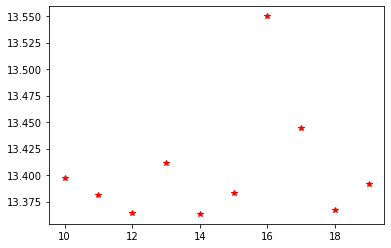

In [10]:
plt.plot(x,y,'*r')
plt.show()

In [11]:
from scipy import stats
import numpy as np
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
#calculer une régression linéaire des moindres carréspour deuxensembles de mesures.

In [12]:
slope

0.0042018181818181755

In [13]:
intercept


13.344463636363637

In [14]:
yy=[slope *u +intercept for u in x]

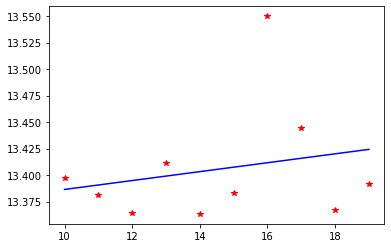

In [15]:
plt.plot(x,y,'*r',x,yy,'b')